In [1]:
#install packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:

# reading the dataset using read_csv
df = pd.read_csv("precipitationSF.csv", 
                 parse_dates=True, 
                 index_col="DATE")
  
# displaying the first five rows of dataset
df.head()

,STATION,NAME,PRCP
DATE,,,
1950-07-20,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-21,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-22,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-23,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-24,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0


In [3]:
#counting the null values
print(df.isnull().sum())

STATION    0
NAME       0
PRCP       0
dtype: int64


In [4]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [5]:
#counting the null values
print(df.isnull().sum())

STATION    0
NAME       0
PRCP       0
dtype: int64


In [6]:
df.head()

,STATION,NAME,PRCP
DATE,,,
1950-07-20,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-21,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-22,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-23,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0
1950-07-24,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",0.0


<AxesSubplot:xlabel='DATE'>

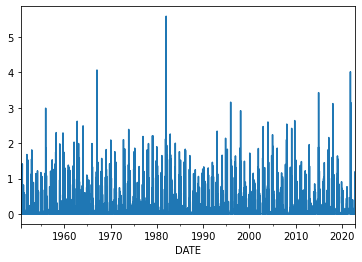

In [7]:



df['PRCP'].plot()




<BarContainer object of 869 artists>

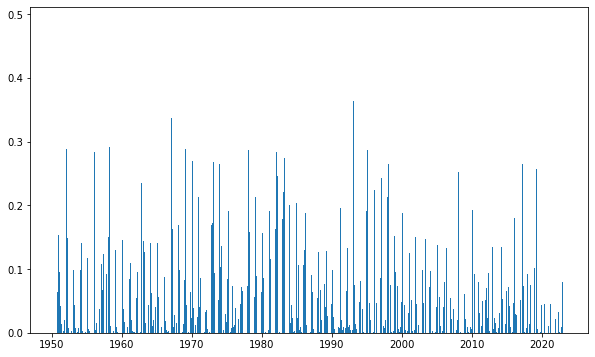

In [12]:
# Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean()
  
# using subplot
fig, ax = plt.subplots(figsize=(10, 6))
  
# plotting bar graph
ax.bar(df_month['1950':].index, 
       df_month.loc['1950':, "PRCP"], 
       width=25, align='center')

Differencing: Differencing is used to make the difference in values of a specified interval. By default, it’s one, we can specify different values for plots. It is the most popular method to remove trends in the data.

<AxesSubplot:xlabel='DATE'>

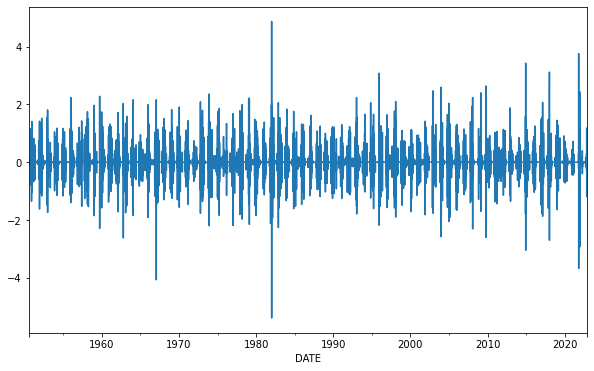

In [13]:
df.PRCP.diff(1).plot(figsize=(10, 6))


In [14]:
#counting the null values
print(df_month.isnull().sum())

PRCP    0
dtype: int64


In [15]:
df_month.head()

,PRCP
DATE,
1950-07-31,0.000000
1950-08-31,0.000000
1950-09-30,0.003667
1950-10-31,0.063871
1950-11-30,0.096667


In [16]:
df_month.fillna(method='ffill', inplace=True)
df_month.fillna(method='bfill', inplace=True)

In [17]:


# ETS Decomposition
result1 = seasonal_decompose(df['PRCP'], 
                            model ='additive', period=365)

# ETS Decomposition
result2 = seasonal_decompose(df['PRCP'], 
                            model ='additive', period=30)

# ETS Decomposition
result3 = seasonal_decompose(df['PRCP'], 
                            model ='additive', period=12)

# ETS Decomposition
result4 = seasonal_decompose(df['PRCP'], 
                            model ='additive', period=7)


# ETS Decomposition
result5 = seasonal_decompose(df_month['PRCP'], 
                            model ='additive', period=24)

# ETS Decomposition
result6 = seasonal_decompose(df_month['PRCP'], 
                            model ='additive', period=12)

# ETS Decomposition
result7 = seasonal_decompose(df_month['PRCP'], 
                            model ='additive', period=4)


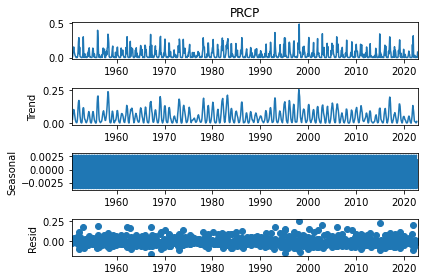

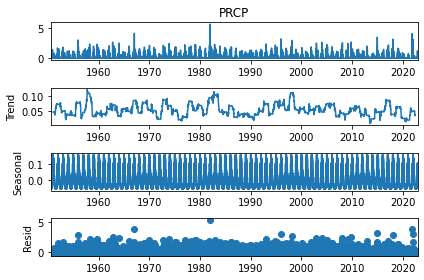

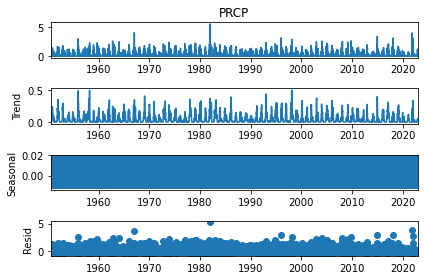

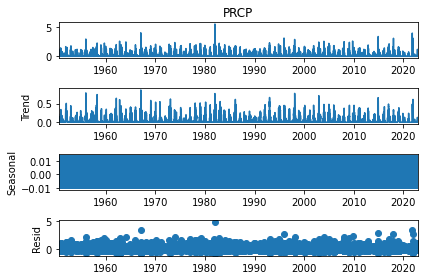

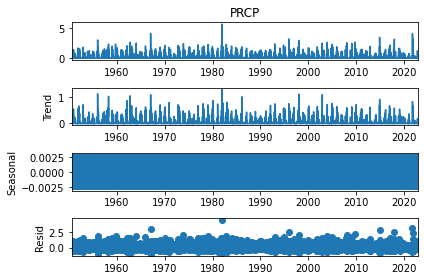

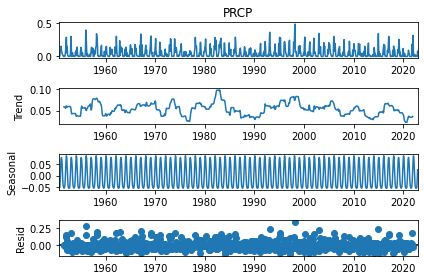

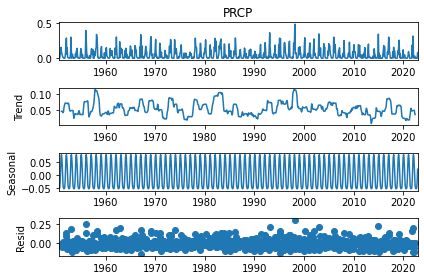

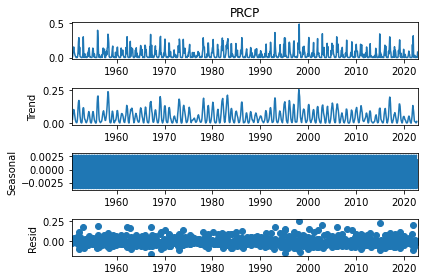

In [18]:
# ETS plot 
result1.plot()
result2.plot()
result3.plot()
result4.plot()
result5.plot()
result6.plot()
result7.plot()


In [19]:
import statsmodels.tsa.holtwinters as ets
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/Users/pallav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


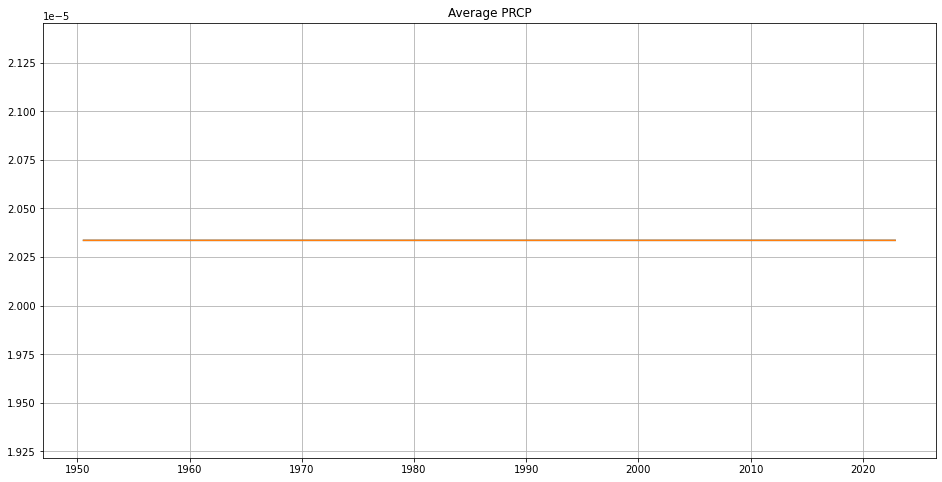

In [20]:
fit2 = SimpleExpSmoothing(np.asarray(df['PRCP'])).fit(smoothing_level=0.6)

df['PRCP'] = fit2.forecast(len(df))
plt.figure(figsize=(16,8))
plt.plot(df['PRCP'])
plt.plot(df.PRCP, label='Actual')
plt.title('Average PRCP')
plt.grid(True)
plt.show()

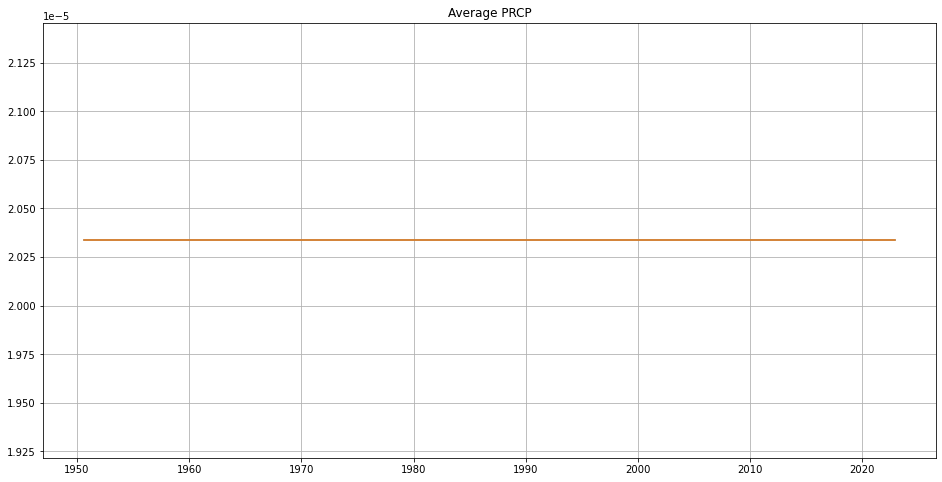

In [21]:
fit3 = SimpleExpSmoothing(np.asarray(df_month['PRCP'])).fit(smoothing_level=0.6)

df_month['PRCP'] = fit2.forecast(len(df_month))
plt.figure(figsize=(16,8))
plt.plot(df_month['PRCP'])
plt.plot(df_month.PRCP, label='Actual')
plt.title('Average PRCP')
plt.grid(True)
plt.show()

In [22]:
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/Users/pallav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/pallav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


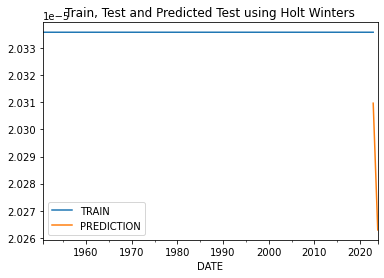

In [23]:
fitted_model = ExponentialSmoothing(df['PRCP'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(365)

df['PRCP'].plot(legend=True,label='TRAIN')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
test_predictions.to_csv("predictions.csv")